<a href="https://colab.research.google.com/github/juveriaasma/Stock-Price-Prediction-with-LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Stock price prediction for next day using LSTM for the Open price.

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense
import sklearn.metrics

SHEET_ID = '1CAUr5wAQRprvLhT8V8BH3syiFeKdtYKvK_QycPI-OVo'


In [3]:
def select_company(comp_name):
    # Reliance
    if comp_name.lower() == "reliance":
        SHEET_NAME = 'Reliance'

    # State Bank of India
    elif comp_name.lower() == "state bank of india":
        SHEET_NAME = 'SBI'

    # Yes Bank
    elif comp_name.lower() == "yes bank":
        SHEET_NAME = 'Yesbank'

    # Tata Motors
    elif comp_name.lower() == "tata motors":
        SHEET_NAME = 'TataMotors'

    # Zomato
    elif comp_name.lower() == "zomato":
        SHEET_NAME = 'Zomato'

    # Kotak Bank
    elif comp_name.lower() == "kotak bank":
        SHEET_NAME = 'KotakBank'

    # Bharat Heavy Electronics Limited
    elif comp_name.lower() == "bharat heavy electricals limited":
        SHEET_NAME = 'BHEL'

    # Reliance Power
    elif comp_name.lower() == "reliance power":
        SHEET_NAME = 'ReliancePower'

    # ICICI Bank
    elif comp_name.lower() == "icici bank":
        SHEET_NAME = 'ICICI'

    # National Thermal Power Corporation
    elif comp_name.lower() == "ntpc":
        SHEET_NAME = 'NTPC'

    url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
    df = pd.read_csv(url)
    df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
    return df

compname = input('Enter Company Name: ')

df = select_company(compname)
print(df)




Enter Company Name: zomato
                   Date    Open    High     Low   Close     Volume
0    7/23/2021 15:30:00  116.00  138.90  115.00  126.00  694895290
1    7/26/2021 15:30:00  126.35  143.75  125.30  140.65  249723854
2    7/27/2021 15:30:00  141.70  147.80  127.75  132.90  240341900
3    7/28/2021 15:30:00  131.00  135.00  123.55  131.20  159793731
4    7/29/2021 15:30:00  134.95  144.00  132.20  141.55  117973089
..                  ...     ...     ...     ...     ...        ...
538  9/25/2023 15:30:00  100.30  100.50   97.75   98.45   34410972
539  9/26/2023 15:30:00   98.60  100.40   97.90   99.90   36822528
540  9/27/2023 15:30:00   99.90  101.20   98.50  100.10   34894254
541  9/28/2023 15:30:00  100.35  100.60   99.30   99.95   25885383
542  9/29/2023 15:30:00  100.05  102.75   99.60  101.50   49524816

[543 rows x 6 columns]


<ipython-input-4-8a2d04272417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted[["Open", "High", "Low", "Close", "Volume"]] = df_adjusted[["Open", "High", "Low", "Close", "Volume"]].apply(pd.to_numeric)
<ipython-input-4-8a2d04272417>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted["Date"] = pd.to_datetime(df_adjusted["Date"])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
187/187 [==============================] - 14s 52ms/step - loss: 0.0090
Epoch 2/15
187/187 [==============================] - 9s 49ms/ste

<ipython-input-4-8a2d04272417>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


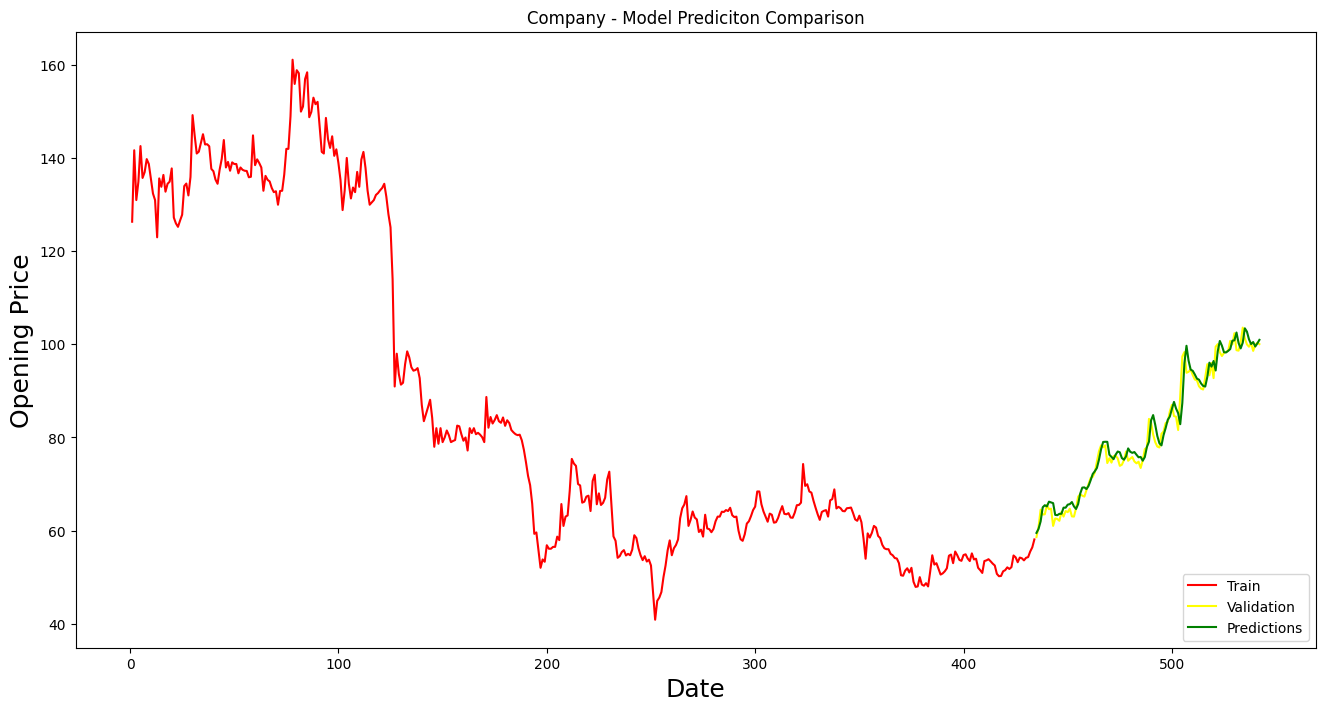

1/1 [==============================] - 0s 29ms/step
Opening Price of zomato tomorrow:[[100.9911]]


In [4]:
df_adjusted = df.loc[1:,]
df_adjusted[["Open", "High", "Low", "Close", "Volume"]] = df_adjusted[["Open", "High", "Low", "Close", "Volume"]].apply(pd.to_numeric)
df_adjusted["Date"] = pd.to_datetime(df_adjusted["Date"])

df = df_adjusted

open_prices = df['Open']
values = open_prices.values
training_data_len = math.ceil(len(values)* 0.8)

#preprocessing using minmaxscaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

#getting the training set and testing set separated
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#prep the testing set
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size= 2, epochs= 15)

#evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#error metrics
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
r2 = sklearn.metrics.r2_score(y_test,predictions)

data= df.filter(['Open'])
train = data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Company - Model Prediciton Comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Opening Price', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid['Predictions'] , color='green')
plt.legend(['Train','Validation', 'Predictions'], loc='lower right')
plt.show()

valid.tail(15)

new_df = df.filter(['Open'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {compname} tomorrow:{pred_price}')

#to save the model uncomment the below line
#model.save('stockcast_lstm.h5')